# Satellite SST upwelling notebook

Source: NASA JPL MUR project https://podaac.jpl.nasa.gov/Multi-scale_Ultra-high_Resolution_MUR-SST

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta
from cmocean import cm

%matplotlib inline

In [18]:
def plot_SST(startdate):

    fig, axs = plt.subplots(2, 4, figsize=(15, 10))
    cax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
    axs = axs.reshape(8)

    for ax, day in zip(axs, range(8)):
        date = startdate + timedelta(days=day)
        prefix = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/GDS2/L4/GLOB/JPL/MUR/v4.1'
        suffix = '-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc'
        fn = os.path.join(prefix, date.strftime('%Y'), date.strftime('%j'), date.strftime('%Y%m%d%H%M%S') + suffix)
        with xr.open_dataset(fn) as data:
            SST = data.analysed_sst.sel(lat=slice(48.6, 50.5), lon=slice(-125.5, -122.5))[0, ...].values - 273.15
        c = ax.pcolormesh(SST, cmap=cm.thermal, vmin=12, vmax=20)
    fig.colorbar(c, cax=cax)
    
    return

***

## Vancouver Island upwelling

### September 2015

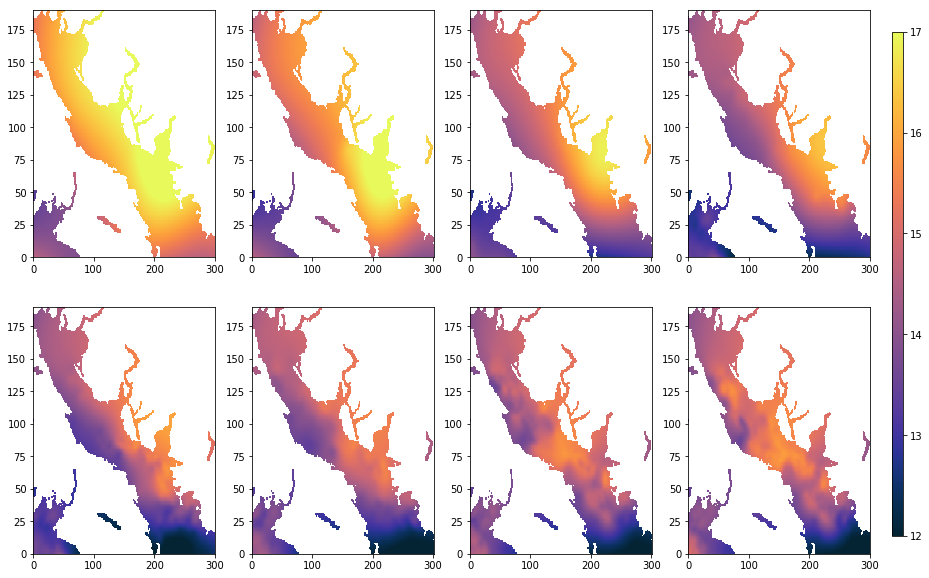

In [4]:
plot_SST(datetime(2015, 8, 29, 9))

### September 2016

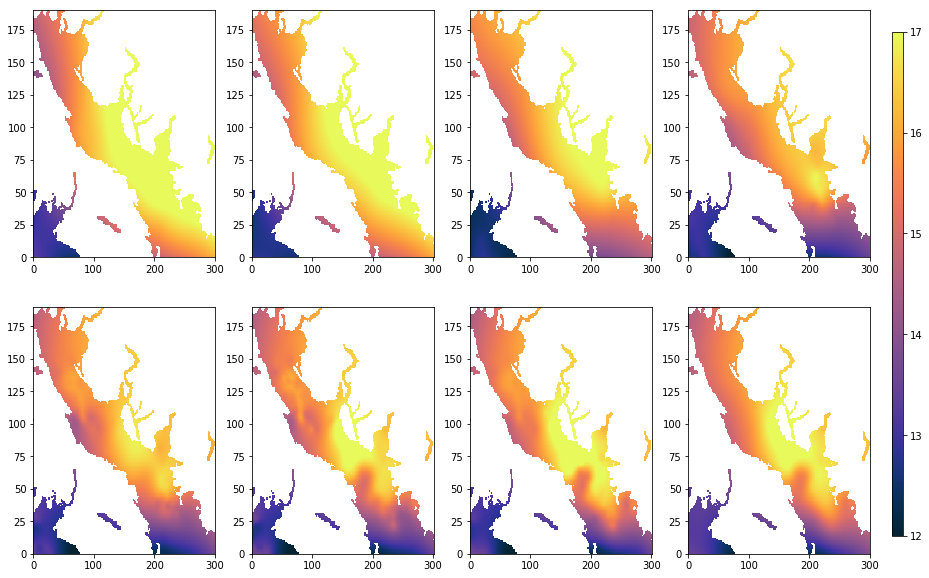

In [5]:
plot_SST(datetime(2016, 8, 30, 9))

### September 2018

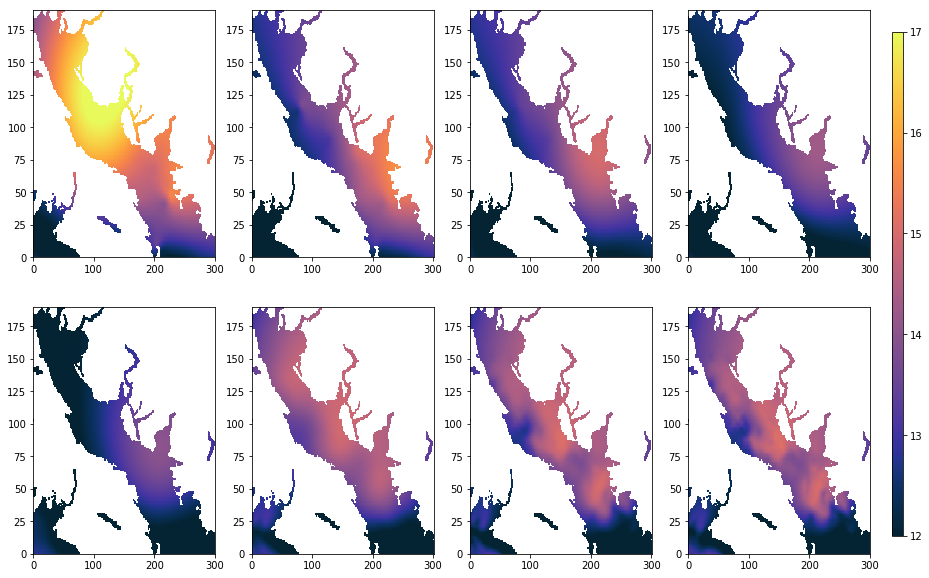

In [6]:
plot_SST(datetime(2018, 9, 11, 9))

***

## Mainland upwelling

### June 2015

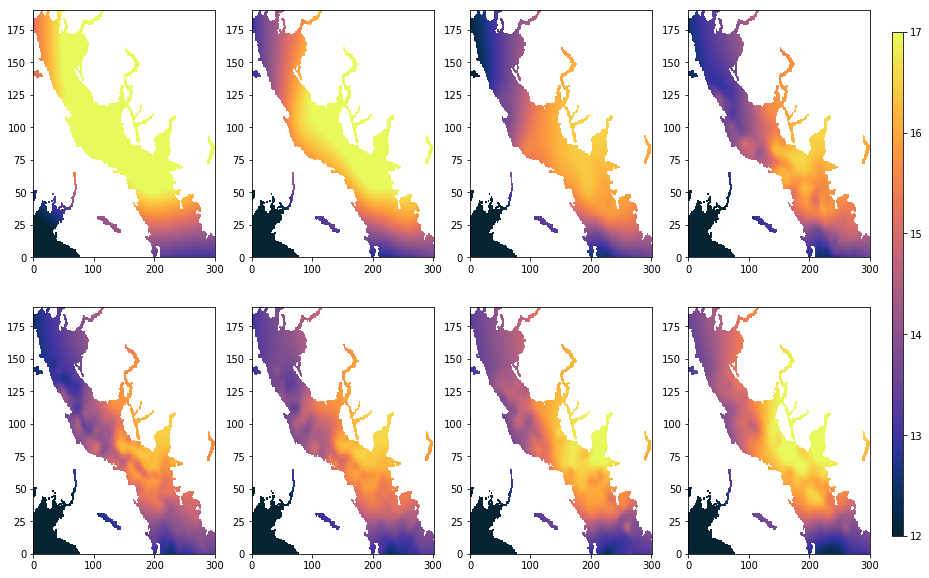

In [7]:
plot_SST(datetime(2015, 6, 10, 9))

### August 2015

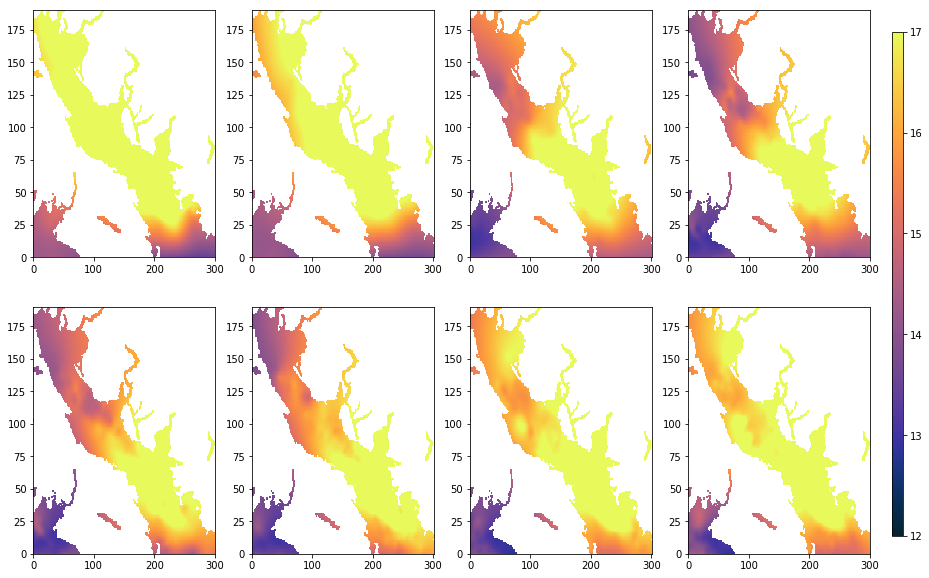

In [9]:
plot_SST(datetime(2015, 8, 18, 9))

### May 2016

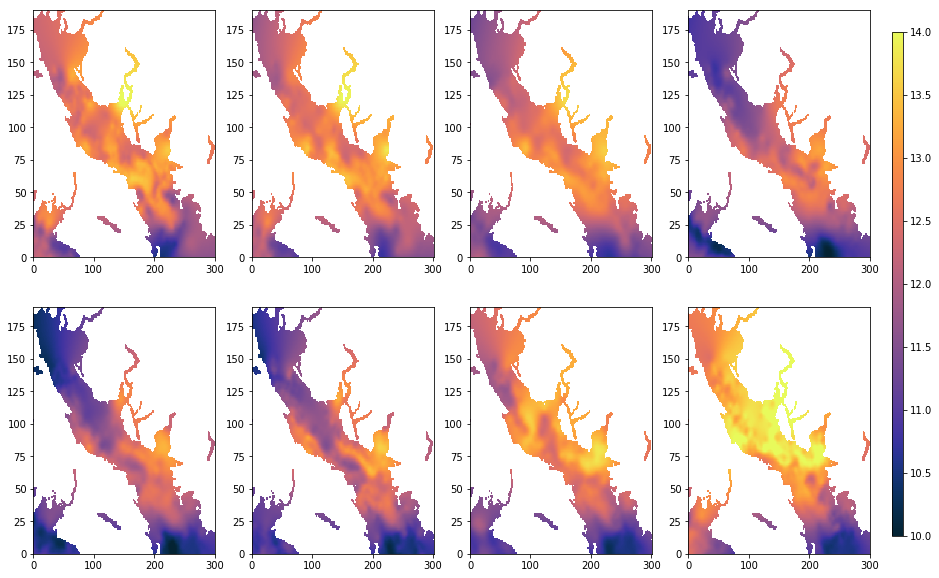

In [14]:
plot_SST(datetime(2016, 5, 5, 9))

## Publication plots

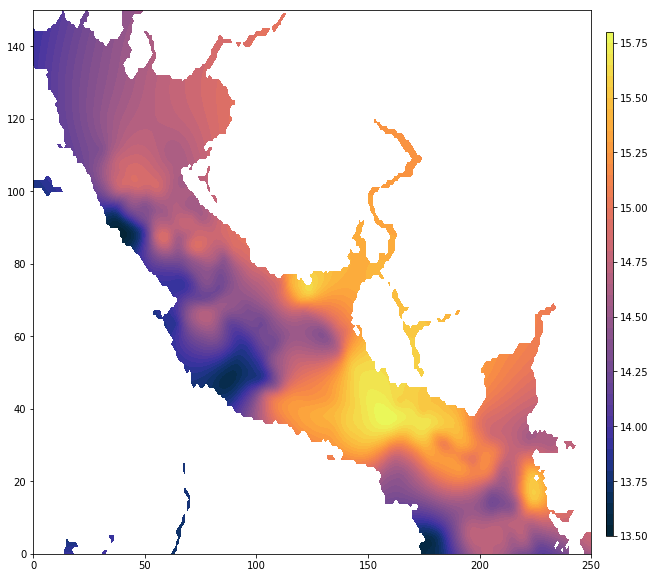

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cax = fig.add_axes([0.92, 0.15, 0.01, 0.7])

date = datetime(2015, 9, 4, 9)
prefix = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/GDS2/L4/GLOB/JPL/MUR/v4.1'
suffix = '-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc'
fn = os.path.join(prefix, date.strftime('%Y'), date.strftime('%j'), date.strftime('%Y%m%d%H%M%S') + suffix)
with xr.open_dataset(fn) as data:
    SST = data.analysed_sst.sel(lat=slice(49, 50.5), lon=slice(-125.5, -123))[0, ...].values - 273.15
c = ax.contourf(SST, cmap=cm.thermal, levels=np.arange(13.5, 15.8, 0.05))

fig.colorbar(c, cax=cax)